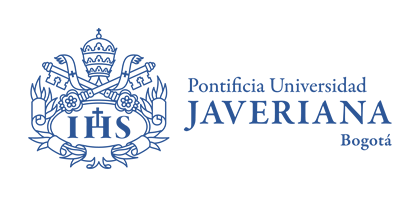

# Entrega 2 - Proyecto CANTEMIST
# Análisis Avanzado de Corpus Biomédico con NER Expandido

## Procesamiento del Lenguaje Natural

### Integrantes Grupo 6

- Mateo Ruiz Mendoza (mateo-ruizm@javeriana.edu.co)
- Carlos Alberto Trujillo (ca.trujillo@javeriana.edu.co)
- Carlos Manuel Carvajales Castrillo (ca.carvajales@javeriana.edu.co)

In [14]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv

In [29]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.7 MB/s eta 0:00:00


In [4]:
# Instalación de librerías necesarias
!pip install -q nltk matplotlib pandas textstat spacy scikit-learn wordcloud seaborn transformers datasets
!pip install -q es_core_news_sm @https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl
!python -m spacy download es_core_news_md

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00
ERROR: Invalid requirement: '@https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl': Expected package name at the start of dependency specifier
    @https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl
    ^
Hint: It looks like a path. File '@https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl' does not exist.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 17.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's d

In [1]:
import warnings
warnings.filterwarnings('ignore')


import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE
import spacy
from wordcloud import WordCloud
import textstat

# Descargas NLTK necesarias
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# 1. Correcciones y Modificaciones respecto a la Entrega 1

## Cambios implementados:
### 1. **Tratamiento inteligente de stopwords**: Creación de lista personalizada para dominio médico
### 2. **NER expandido**: Incorporación de múltiples categorías de entidades
### 3. **Análisis semántico profundo**: Integración de embeddings y análisis contextual
### 4. **Métricas avanzadas**: Diversidad léxica, coocurrencias, n-gramas

In [2]:
import zipfile
import os

def descomprimir_zip(ruta_zip, carpeta_destino):
    # Verificar si el archivo existe
    if not os.path.exists(ruta_zip):
        print(f"El archivo {ruta_zip} no existe.")
        return

    # Crear carpeta destino si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    # Abrir y extraer el zip
    with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
        zip_ref.extractall(carpeta_destino)
        print(f"Archivo descomprimido en: {carpeta_destino}")

# Ejemplo de uso
ruta_zip = "cantemist.zip"            # Ruta al archivo zip
carpeta_destino = "cantemist"  # Carpeta donde se extraerá
descomprimir_zip(ruta_zip, carpeta_destino)

Archivo descomprimido en: cantemist


In [3]:
# Cargar modelo de spaCy para español
nlp = spacy.load("es_core_news_md")

# Función mejorada para cargar textos
def cargar_textos_mejorado(carpeta_textos):
    """Carga textos con metadatos adicionales"""
    documentos = []
    for archivo in os.listdir(carpeta_textos):
        if archivo.endswith(".txt"):
            ruta = os.path.join(carpeta_textos, archivo)
            with open(ruta, "r", encoding="utf-8") as f:
                contenido = f.read()
                # Extraer ID del archivo
                doc_id = archivo.replace('.txt', '')
                documentos.append({
                    "doc_id": doc_id,
                    "archivo": archivo,
                    "texto": contenido,
                    "longitud_caracteres": len(contenido),
                    "fecha_carga": pd.Timestamp.now()
                })
    return pd.DataFrame(documentos)

# Cargar datos
carpeta_train = "/content/cantemist/background-set"
df_textos = cargar_textos_mejorado(carpeta_train)
print(f"Total de documentos cargados: {len(df_textos)}")
print(f"Columnas del dataset: {df_textos.columns.tolist()}")

Total de documentos cargados: 4932
Columnas del dataset: ['doc_id', 'archivo', 'texto', 'longitud_caracteres', 'fecha_carga']


In [4]:
df_textos.columns

Index(['doc_id', 'archivo', 'texto', 'longitud_caracteres', 'fecha_carga'], dtype='object')

### Creación de Stopwords Personalizadas para Dominio Médico

In [5]:
# Stopwords personalizadas: conservar términos médicos importantes
from nltk.corpus import stopwords

stopwords_base = set(stopwords.words('spanish'))

# Términos médicos que NO deben ser eliminados (tienen valor clínico)
terminos_medicos_importantes = {
    'no', 'sin', 'con', 'anti', 'pre', 'post', 'contra', 'sobre',
    'bajo', 'tras', 'ante', 'entre', 'dentro', 'fuera', 'después',
    'antes', 'durante', 'mediante', 'versus', 'via', 'oral', 'total',
    'parcial', 'agudo', 'crónico', 'primario', 'secundario'
}

# Crear stopwords personalizadas (removiendo términos médicos importantes)
stopwords_medicas = stopwords_base - terminos_medicos_importantes

print(f"Stopwords originales: {len(stopwords_base)}")
print(f"Stopwords personalizadas (dominio médico): {len(stopwords_medicas)}")
print(f"Términos médicos conservados: {terminos_medicos_importantes}")

Stopwords originales: 313
Stopwords personalizadas (dominio médico): 303
Términos médicos conservados: {'fuera', 'después', 'sin', 'contra', 'anti', 'primario', 'total', 'crónico', 'post', 'no', 'parcial', 'bajo', 'oral', 'entre', 'versus', 'con', 'tras', 'mediante', 'pre', 'antes', 'agudo', 'dentro', 'ante', 'secundario', 'via', 'durante', 'sobre'}


### 2. Análisis Exploratorio Avanzado

In [6]:
import nltk
nltk.download('punkt_tab')

def analisis_exploratorio_avanzado(df):
    """Análisis exhaustivo del corpus"""

    # Estadísticas básicas
    df['num_palabras'] = df['texto'].apply(lambda x: len(x.split()))
    df['num_oraciones'] = df['texto'].apply(lambda x: len(nltk.sent_tokenize(x)))
    df['num_caracteres'] = df['texto'].apply(len)
    df['palabras_unicas'] = df['texto'].apply(lambda x: len(set(x.lower().split())))

    # Métricas de diversidad léxica
    df['diversidad_lexica'] = df['palabras_unicas'] / df['num_palabras']
    df['promedio_palabras_oracion'] = df['num_palabras'] / df['num_oraciones']

    # Análisis estadístico
    stats_df = pd.DataFrame({
        'Métrica': ['Palabras totales', 'Oraciones totales', 'Palabras únicas totales',
                   'Promedio palabras/doc', 'Promedio oraciones/doc',
                   'Diversidad léxica promedio'],
        'Valor': [
            df['num_palabras'].sum(),
            df['num_oraciones'].sum(),
            len(set(' '.join(df['texto']).lower().split())),
            df['num_palabras'].mean(),
            df['num_oraciones'].mean(),
            df['diversidad_lexica'].mean()
        ]
    })

    return df, stats_df

df_textos, estadisticas = analisis_exploratorio_avanzado(df_textos)
print("\n============= ESTADÍSTICAS DEL CORPUS =============")
print(estadisticas.to_string(index=False))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



============= ESTADÍSTICAS DEL CORPUS =============
                   Métrica        Valor
          Palabras totales 1.645411e+06
         Oraciones totales 7.668900e+04
   Palabras únicas totales 1.048930e+05
     Promedio palabras/doc 3.336194e+02
    Promedio oraciones/doc 1.554927e+01
Diversidad léxica promedio 6.421358e-01


### Análisis de N-gramas y Coocurrencias

In [7]:
from nltk import ngrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

def extraer_ngramas(texto, n=2, num_top=20):
    """Extrae los n-gramas más frecuentes"""
    # Tokenizar y limpiar
    tokens = texto.lower().split()
    tokens = [t for t in tokens if t not in stopwords_medicas and len(t) > 2]

    # Generar n-gramas
    n_grams = ngrams(tokens, n)
    freq_dist = nltk.FreqDist(n_grams)

    return freq_dist.most_common(num_top)

# Análisis de bigramas y trigramas
corpus_completo = ' '.join(df_textos['texto'])

print("\n=== TOP 20 BIGRAMAS ===")
bigramas = extraer_ngramas(corpus_completo, n=2, num_top=20)
for bigrama, freq in bigramas:
    print(f"{' '.join(bigrama)}: {freq}")

print("\n=== TOP 20 TRIGRAMAS ===")
trigramas = extraer_ngramas(corpus_completo, n=3, num_top=20)
for trigrama, freq in trigramas:
    print(f"{' '.join(trigrama)}: {freq}")


=== TOP 20 BIGRAMAS ===
tratamiento con: 2234
varón años: 1131
mujer años: 986
compatible con: 955
exploración física: 839
con antecedentes: 759
sin antecedentes: 750
años con: 714
con diagnóstico: 672
dolor abdominal: 636
años edad,: 607
inició tratamiento: 599
años edad: 595
examen físico: 542
antecedentes personales: 541
compatibles con: 540
radiografía tórax: 522
paciente años: 453
acude urgencias: 441
sin signos: 409

=== TOP 20 TRIGRAMAS ===
inició tratamiento con: 370
años con antecedentes: 272
varón años con: 255
mujer años con: 237
paciente varón años: 203
varón años edad: 182
años, sin antecedentes: 179
inicia tratamiento con: 177
años edad con: 168
varón años edad,: 159
mujer años edad: 149
acude servicio urgencias: 148
hallazgos compatibles con: 148
años sin antecedentes: 143
años acude urgencias: 138
mujer años edad,: 133
años, con antecedentes: 133
tomografía computarizada (tc): 128
unidad cuidados intensivos: 128
con antecedentes personales: 127


### Análisis de Colocaciones con Medidas de Asociación

In [8]:
def analizar_colocaciones(texto):
    """Encuentra colocaciones significativas usando PMI"""
    tokens = texto.lower().split()
    tokens = [t for t in tokens if t not in stopwords_medicas and len(t) > 2]

    # Bigramas con PMI
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(5)  # Mínimo 5 apariciones

    # Top colocaciones por PMI
    pmi_bigramas = finder.nbest(bigram_measures.pmi, 15)

    # Trigramas con PMI
    trigram_measures = TrigramAssocMeasures()
    finder3 = TrigramCollocationFinder.from_words(tokens)
    finder3.apply_freq_filter(3)
    pmi_trigramas = finder3.nbest(trigram_measures.pmi, 10)

    return pmi_bigramas, pmi_trigramas

bi_coloc, tri_coloc = analizar_colocaciones(corpus_completo)

print("\n=== COLOCACIONES SIGNIFICATIVAS (PMI) ===")
print("\nBigramas:")
for bigrama in bi_coloc:
    print(f"  {' '.join(bigrama)}")

print("\nTrigramas:")
for trigrama in tri_coloc:
    print(f"  {' '.join(trigrama)}")


=== COLOCACIONES SIGNIFICATIVAS (PMI) ===

Bigramas:
  25-oh vit.
  "vidrio esmerilado"
  luis calvo
  precipitados queráticos
  traje epi
  york heart
  eastern cooperative
  polígono willis
  sincronización electrocardiográfica:
  fsh, lh,
  cooperative oncology
  livedo reticularis
  peryódico schiff
  cam 5.2,
  cocientes d/p

Trigramas:
  (renasys®, smith&nephew®, londres,
  hernán henríquez aravena
  smith&nephew®, londres, reino
  carolina muñoz codoceo.
  (qiaamp tissue kit,
  luis calvo mackenna
  institute health stroke
  mielínicas delgadas amielínicas.
  terrassa (barcelona). españa.
  new york heart


### 3. NER Expandido - Múltiples Categorías de Entidades

In [9]:
def ner_medico_expandido(texto):
    """
    Reconocimiento de entidades expandido para dominio médico
    Categorías: MORFOLOGÍA, PROCEDIMIENTO, MEDICAMENTO, SÍNTOMA, ANATOMÍA
    """
    doc = nlp(texto[:1000000])  # Limitar por memoria

    entidades = {
        'MORFOLOGIA': [],
        'PROCEDIMIENTO': [],
        'MEDICAMENTO': [],
        'SINTOMA': [],
        'ANATOMIA': [],
        'ORGANIZACION': [],
        'PERSONA': []
    }

    # Patrones médicos específicos
    patrones_medicos = {
        'MORFOLOGIA': r'\b(tumor|neoplasia|carcinoma|adenocarcinoma|metástasis|lesión|nódulo)\b',
        'PROCEDIMIENTO': r'\b(biopsia|cirugía|radioterapia|quimioterapia|resonancia|tomografía|análisis)\b',
        'MEDICAMENTO': r'\b(mg|ml|dosis|tratamiento|fármaco|medicamento|terapia)\b',
        'SINTOMA': r'\b(dolor|fiebre|náuseas|vómito|fatiga|pérdida|aumento)\b',
        'ANATOMIA': r'\b(mama|pulmón|hígado|riñón|cerebro|hueso|sangre|tejido|órgano)\b'
    }

    # Buscar patrones específicos
    for categoria, patron in patrones_medicos.items():
        matches = re.finditer(patron, texto.lower())
        for match in matches:
            entidades[categoria].append(match.group())

    # Usar spaCy para entidades generales
    for ent in doc.ents:
        if ent.label_ in ['PER', 'PERSON']:
            entidades['PERSONA'].append(ent.text)
        elif ent.label_ in ['ORG']:
            entidades['ORGANIZACION'].append(ent.text)

    # Contar frecuencias
    for categoria in entidades:
        entidades[categoria] = Counter(entidades[categoria])

    return entidades

# Aplicar NER a cada documento
print("\n=== ANÁLISIS NER EXPANDIDO ===")
todas_entidades = {cat: Counter() for cat in ['MORFOLOGIA', 'PROCEDIMIENTO', 'MEDICAMENTO',
                                              'SINTOMA', 'ANATOMIA', 'ORGANIZACION', 'PERSONA']}

for idx, row in df_textos.iterrows():
    ents = ner_medico_expandido(row['texto'])
    for categoria, contador in ents.items():
        todas_entidades[categoria].update(contador)

# Mostrar resultados
for categoria, contador in todas_entidades.items():
    if contador:
        print(f"\n{categoria} (Top 10):")
        for entidad, freq in contador.most_common(10):
            print(f"  {entidad}: {freq}")


=== ANÁLISIS NER EXPANDIDO ===

MORFOLOGIA (Top 10):
  lesión: 2407
  tumor: 1013
  carcinoma: 759
  metástasis: 709
  adenocarcinoma: 448
  neoplasia: 416
  nódulo: 312

PROCEDIMIENTO (Top 10):
  biopsia: 1478
  cirugía: 1305
  tomografía: 941
  quimioterapia: 534
  análisis: 532
  resonancia: 461
  radioterapia: 371

MEDICAMENTO (Top 10):
  tratamiento: 7172
  mg: 5837
  ml: 1937
  dosis: 1314
  terapia: 664
  fármaco: 92
  medicamento: 26

SINTOMA (Top 10):
  dolor: 3370
  aumento: 1369
  fiebre: 1264
  pérdida: 778
  náuseas: 265
  vómito: 46
  fatiga: 30

ANATOMIA (Top 10):
  tejido: 853
  sangre: 706
  riñón: 477
  mama: 274
  hígado: 251
  pulmón: 240
  hueso: 180
  cerebro: 142
  órgano: 39

ORGANIZACION (Top 10):
  TC: 304
  UCI: 276
  CEA: 141
  ECG: 141
  AP: 119
  PSA: 116
  HTA: 113
  AO: 112
  FA: 110
  Unidad de Cuidados Intensivos: 101

PERSONA (Top 10):
  Varón: 1031
  Urgencias: 221
  Hallazgos: 149
  Acude: 138
  Analítica: 109
  Había: 95
  Anamnesis
Mujer: 68
  Ma

### 4. Representación de Textos

In [10]:
class RepresentacionTextos:
    """Clase para diferentes métodos de representación de textos"""

    def __init__(self, textos, max_features=1000):
        self.textos = textos
        self.max_features = max_features
        self.vectorizers = {}
        self.representaciones = {}

    def bag_of_words(self):
        """Representación Bag of Words"""
        self.vectorizers['bow'] = CountVectorizer(
            max_features=self.max_features,
            stop_words=list(stopwords_medicas),
            ngram_range=(1, 2)
        )
        self.representaciones['bow'] = self.vectorizers['bow'].fit_transform(self.textos)
        return self.representaciones['bow']

    def tfidf(self):
        """Representación TF-IDF"""
        self.vectorizers['tfidf'] = TfidfVectorizer(
            max_features=self.max_features,
            stop_words=list(stopwords_medicas),
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )
        self.representaciones['tfidf'] = self.vectorizers['tfidf'].fit_transform(self.textos)
        return self.representaciones['tfidf']

    def get_embeddings_promedio(self, texto):
        """Obtiene embeddings promedio usando spaCy"""
        doc = nlp(texto[:10000])  # Limitar por memoria
        vectors = [token.vector for token in doc if token.has_vector and not token.is_stop]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(nlp.vocab.vectors_length)

    def embeddings(self):
        """Representación con Word Embeddings (spaCy)"""
        print("Generando embeddings... (puede tomar tiempo)")
        embeddings = []
        for texto in self.textos[:50]:  # Limitar para demo
            embeddings.append(self.get_embeddings_promedio(texto))
        self.representaciones['embeddings'] = np.array(embeddings)
        return self.representaciones['embeddings']

    def comparar_representaciones(self):
        """Compara diferentes representaciones"""
        comparacion = pd.DataFrame({
            'Método': ['Bag of Words', 'TF-IDF', 'Word Embeddings'],
            'Dimensionalidad': [
                self.representaciones['bow'].shape[1] if 'bow' in self.representaciones else 0,
                self.representaciones['tfidf'].shape[1] if 'tfidf' in self.representaciones else 0,
                self.representaciones['embeddings'].shape[1] if 'embeddings' in self.representaciones else 0
            ],
            'Tipo': ['Frecuencia', 'Frecuencia ponderada', 'Semántico'],
            'Contexto': ['No', 'No', 'Sí']
        })
        return comparacion

# Crear representaciones
print("\n=== GENERANDO REPRESENTACIONES DE TEXTO ===")
rep = RepresentacionTextos(df_textos['texto'].tolist())

# Generar todas las representaciones
bow_matrix = rep.bag_of_words()
tfidf_matrix = rep.tfidf()
embeddings_matrix = rep.embeddings()

# Comparar métodos
comparacion = rep.comparar_representaciones()
print("\nComparación de métodos:")
print(comparacion)

# Mostrar ejemplo de representación
print("\n=== EJEMPLO DE REPRESENTACIÓN (Primer documento) ===")
print(f"\nTexto original (primeros 200 caracteres):\n{df_textos['texto'].iloc[0][:200]}...")

# BoW ejemplo
print(f"\nBag of Words (primeras 10 características):")
bow_features = rep.vectorizers['bow'].get_feature_names_out()[:10]
bow_values = bow_matrix[0].toarray()[0][:10]
for feat, val in zip(bow_features, bow_values):
    if val > 0:
        print(f"  {feat}: {val}")

# TF-IDF ejemplo
print(f"\nTF-IDF (top 10 términos por peso):")
tfidf_features = rep.vectorizers['tfidf'].get_feature_names_out()
tfidf_values = tfidf_matrix[0].toarray()[0]
top_indices = np.argsort(tfidf_values)[-10:][::-1]
for idx in top_indices:
    if tfidf_values[idx] > 0:
        print(f"  {tfidf_features[idx]}: {tfidf_values[idx]:.3f}")


=== GENERANDO REPRESENTACIONES DE TEXTO ===
Generando embeddings... (puede tomar tiempo)

Comparación de métodos:
            Método  Dimensionalidad                  Tipo Contexto
0     Bag of Words             1000            Frecuencia       No
1           TF-IDF             1000  Frecuencia ponderada       No
2  Word Embeddings              300             Semántico       Sí

=== EJEMPLO DE REPRESENTACIÓN (Primer documento) ===

Texto original (primeros 200 caracteres):
Escolar de 13 años, sexo masculino en controles en el policlínico de broncopulmonar, con antecedentes de cuadros bronquiales obstructivos frecuentes e infecciones respiratorias recurrentes, con buena ...

Bag of Words (primeras 10 características):
  13: 1

TF-IDF (top 10 términos por peso):
  catéter: 0.456
  torácica: 0.231
  mm: 0.217
  procedió: 0.216
  lóbulo: 0.202
  controles: 0.197
  medio: 0.177
  superior: 0.153
  posteriormente: 0.150
  tórax: 0.146


### 5. Visualización de Representaciones

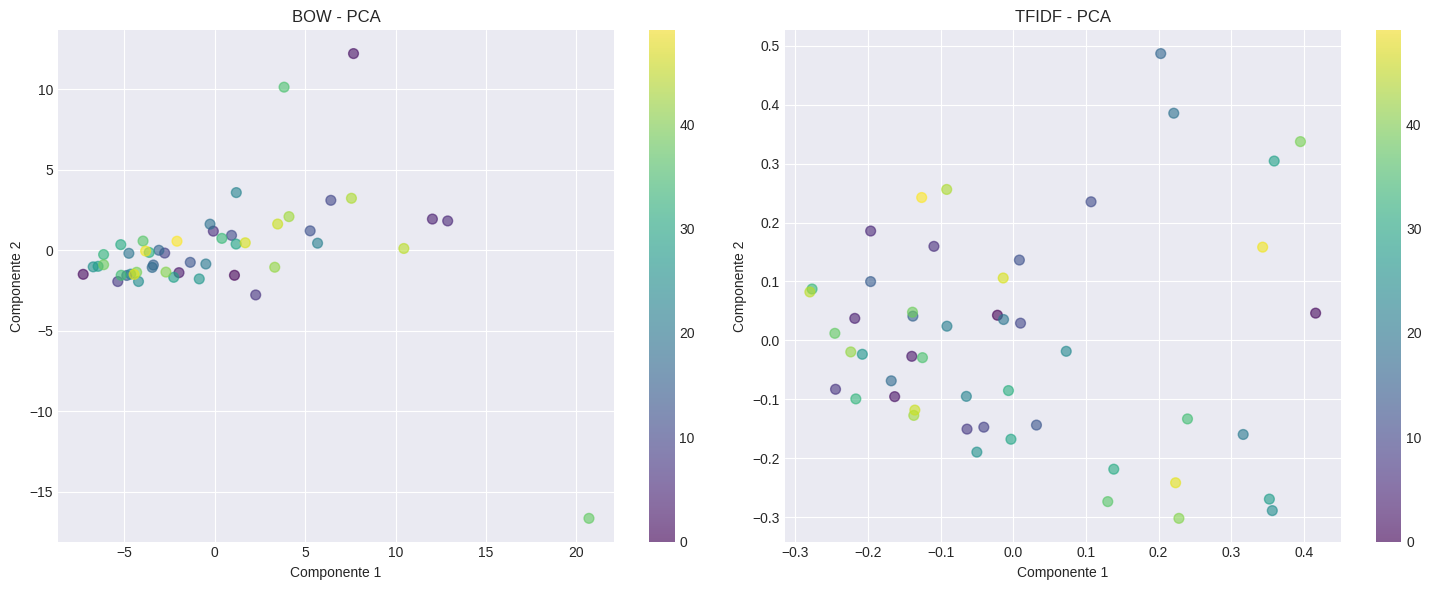

In [11]:
def visualizar_representaciones(representaciones, metodo='PCA'):
    """Visualiza las representaciones en 2D"""

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    for idx, (nombre, matriz) in enumerate(representaciones.items()):
        if nombre == 'embeddings':
            data = matriz
        else:
            data = matriz.toarray()

        # Reducción de dimensionalidad
        if metodo == 'PCA':
            reducer = PCA(n_components=2, random_state=42)
        else:
            reducer = TSNE(n_components=2, random_state=42)

        coords = reducer.fit_transform(data[:50])  # Limitar documentos

        ax = axes[idx] if idx < 2 else axes[1]
        scatter = ax.scatter(coords[:, 0], coords[:, 1],
                           c=range(len(coords)), cmap='viridis',
                           alpha=0.6, s=50)
        ax.set_title(f'{nombre.upper()} - {metodo}')
        ax.set_xlabel('Componente 1')
        ax.set_ylabel('Componente 2')
        plt.colorbar(scatter, ax=ax)

    plt.tight_layout()
    plt.show()

# Visualizar TF-IDF y BoW
visualizar_representaciones({
    'bow': bow_matrix,
    'tfidf': tfidf_matrix
}, metodo='PCA')

### 6. Topic Modeling - Análisis de Tópicos

In [19]:
df_textos.columns

Index(['doc_id', 'archivo', 'texto', 'longitud_caracteres', 'fecha_carga',
       'num_palabras', 'num_oraciones', 'num_caracteres', 'palabras_unicas',
       'diversidad_lexica', 'promedio_palabras_oracion'],
      dtype='object')

#### Preparación para la evaluación de tópicos

In [22]:
# ================================================
# Evaluación del número óptimo de tópicos (LDA)
# ================================================

import re
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

# --- Preprocesamiento y tokenización ---
def limpiar_y_tokenizar(texto):
    # 1. Texto en minúsculas
    texto_lower = texto.lower()

    # 2. Limpieza suave (mantiene puntuación médica relevante)
    texto_limpio_suave = re.sub(r'[^\w\s\.\,\-\/\%\+áéíóúñü]', ' ', texto_lower)
    texto_limpio_suave = re.sub(r'\s+', ' ', texto_limpio_suave).strip()

    # 3. Limpieza estricta (solo alfanumérico)
    texto_limpio_estricto = re.sub(r'[^a-záéíóúñü0-9\s]', ' ', texto_lower)
    texto_limpio_estricto = re.sub(r'\s+', ' ', texto_limpio_estricto).strip()

    # 4. Tokenización
    tokens_completos = texto_limpio_estricto.split()

    # 5. Eliminación de stopwords médicas y tokens cortos
    tokens_sin_stopwords = [
        t for t in tokens_completos
        if t not in stopwords_medicas and len(t) > 2
    ]

    return tokens_sin_stopwords

# Aplicar el preprocesamiento
textos_tokenizados = df_textos['texto'].apply(limpiar_y_tokenizar)

# Crear diccionario y corpus para gensim
diccionario = corpora.Dictionary(textos_tokenizados)
corpus_gensim = [diccionario.doc2bow(texto) for texto in textos_tokenizados]


#### Cálculo de coherencia (determinación de número de tópicos)

In [23]:
from gensim.models.ldamodel import LdaModel
from tqdm.notebook import tqdm

def calcular_coherencia_lda(textos, diccionario, corpus, rango_temas):
    coherencias = []
    for n in tqdm(rango_temas, desc="Evaluando número de tópicos"):
        modelo = LdaModel(
            corpus=corpus,
            id2word=diccionario,
            num_topics=n,
            random_state=42,
            passes=5,
            alpha='auto',
            per_word_topics=True
        )
        coherencia_modelo = CoherenceModel(
            model=modelo,
            texts=textos,
            dictionary=diccionario,
            coherence='c_v'
        )
        coherencias.append(coherencia_modelo.get_coherence())
    return coherencias

# Rango de tópicos a evaluar (ajustable)
rango_temas = range(2, 11)

coherencias = calcular_coherencia_lda(textos_tokenizados, diccionario, corpus_gensim, rango_temas)


Evaluando número de tópicos:   0%|          | 0/9 [00:00<?, ?it/s]

#### Visualización y selección del número óptimo

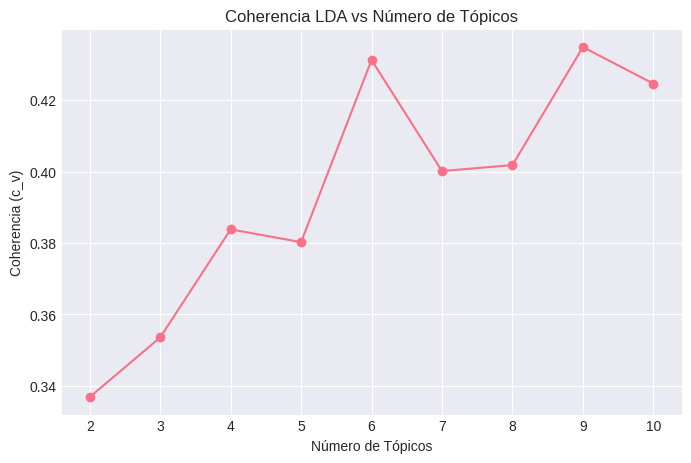

✅ El número óptimo de tópicos sugerido es: 9


In [24]:
plt.figure(figsize=(8, 5))
plt.plot(rango_temas, coherencias, marker='o')
plt.title('Coherencia LDA vs Número de Tópicos')
plt.xlabel('Número de Tópicos')
plt.ylabel('Coherencia (c_v)')
plt.grid(True)
plt.show()

mejor_n = rango_temas[np.argmax(coherencias)]
print(f"✅ El número óptimo de tópicos sugerido es: {mejor_n}")


In [28]:
def topic_modeling_lda(matriz_documentos, vectorizer, n_topics=5, n_palabras=10):
    """Aplica LDA para descubrir tópicos en el corpus"""

    # Aplicar LDA
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        random_state=42,
        learning_method='online',
        max_iter=50
    )

    lda_transform = lda.fit_transform(matriz_documentos)

    # Obtener palabras para cada tópico
    feature_names = vectorizer.get_feature_names_out()
    topics = {}

    for topic_idx, topic in enumerate(lda.components_):
        top_indices = topic.argsort()[-n_palabras:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = [topic[i] for i in top_indices]
        topics[f'Tópico {topic_idx + 1}'] = list(zip(top_words, top_weights))

    return lda, lda_transform, topics

# Aplicar topic modeling
print("\n=== TOPIC MODELING (LDA) ===")
lda_model, doc_topics, topics = topic_modeling_lda(
    bow_matrix,
    rep.vectorizers['bow'],
    n_topics=6,
    n_palabras=15
)

# Mostrar tópicos
for topic_name, words in topics.items():
    print(f"\n{topic_name}:")
    for word, weight in words:
        print(f"  {word}: {weight:.3f}")

# Asignar documento a tópicos
df_textos['topico_principal'] = np.argmax(doc_topics, axis=1)
print("\n=== DISTRIBUCIÓN DE DOCUMENTOS POR TÓPICO ===")
print(df_textos['topico_principal'].value_counts().sort_index())


=== TOPIC MODELING (LDA) ===

Tópico 1:
  con: 7291.987
  mg: 4534.511
  tratamiento: 3270.668
  dl: 2973.344
  mg dl: 2040.339
  sin: 1665.715
  no: 1653.940
  paciente: 1605.248
  ml: 1467.833
  tratamiento con: 1421.574
  día: 1183.889
  normal: 1177.534
  renal: 1107.723
  años: 1011.285
  dosis: 880.547

Tópico 2:
  con: 4779.711
  abdominal: 2397.911
  dolor: 1720.341
  sin: 1172.606
  años: 1076.517
  paciente: 932.029
  tc: 851.229
  dolor abdominal: 831.459
  realiza: 798.105
  abdomen: 756.560
  urgencias: 750.118
  ecografía: 744.490
  evolución: 653.582
  hallazgos: 597.745
  intestinal: 595.305

Tópico 3:
  con: 4214.358
  izquierdo: 1463.508
  derecho: 1461.635
  sin: 1128.837
  años: 1072.698
  ojo: 925.830
  derecha: 893.962
  tc: 842.584
  izquierda: 812.663
  no: 698.815
  paciente: 638.577
  superior: 597.062
  pulmonar: 580.703
  hallazgos: 578.182
  arteria: 568.790

Tópico 4:
  con: 7304.504
  paciente: 3687.049
  no: 2963.771
  años: 1700.106
  tratamiento: 1534

Si bien el numéro óptimo de tópicos por coherencia es 9, luego de experimentar elegimos trabajar con 6 que también tiene una alta coherencia, ya que permite agrupar mejor los tópicos. Con ayuda de GPT obtuvimos una posible interpretación de dichos tópicos de acuerdo con las palabras obtenidas por cada uno.



---



🧠 **Tópico 1 – Tratamientos, dosis y parámetros bioquímicos**

Palabras clave: `mg, dl, mg/dl, tratamiento, ml, dosis, normal, renal, día, paciente`

📖 Interpretación:

Este tópico agrupa textos sobre tratamientos farmacológicos, mediciones clínicas, y resultados de laboratorio (glucosa, creatinina, lípidos, etc.).
Las menciones a mg/dl, ml, dosis, y renal indican monitoreo terapéutico y función renal.

👉 Probablemente describe notas de administración de medicamentos, evolución de tratamientos y resultados de laboratorio.

🧩 Tipo de texto: evolución médica, farmacoterapia, controles bioquímicos.

---

⚕️ **Tópico 2 – Cuadro abdominal y estudios de imagen**

Palabras clave: `abdominal, dolor, abdomen, urgencias, ecografía, tc, hallazgos, intestinal, evolución`

📖 Interpretación:

Agrupa reportes clínicos y de imagen relacionados con dolor abdominal, hallazgos ecográficos o tomográficos, y evaluación digestiva.
Las palabras ecografía, tc, hallazgos, intestinal lo vinculan con diagnóstico por imagen y urgencias abdominales.

👉 Representa textos de diagnóstico clínico o radiológico del abdomen.

🧩 Tipo de texto: informes de radiología, notas de urgencias, epicrisis abdominal.

---

👁️ **Tópico 3 – Órganos con lateralidad y hallazgos anatómicos**

Palabras clave: `izquierdo, derecho, izquierda, derecha, ojo, pulmonar, arteria, superior, tc, hallazgos`

📖 Interpretación:

Tópico orientado a descripciones anatómicas con lateralidad (izquierdo/derecho) — hallazgos en ojos, pulmones, arterias, etc.
La presencia de pulmonar, arteria, tc indica que son reportes de imagen (tomografía, angiografía, oftalmología).

👉 Representa hallazgos localizados anatómicamente o por lateralidad corporal.

🧩 Tipo de texto: estudios de imagen (TC, RX, angiografía), reportes anatómicos.

---

⏳ **Tópico 4 – Evolución clínica y seguimiento temporal**

Palabras clave: `paciente, años, meses, durante, tras, tratamiento, días, edad, dolor, después`

📖 Interpretación:

Tópico claramente temporal — describe la evolución del paciente, tratamientos a lo largo del tiempo, y eventos cronológicos.
Palabras como durante, tras, después, meses, años confirman esa narrativa longitudinal.

👉 Representa seguimiento clínico, evolución post-tratamiento o evolución natural de la enfermedad.

🧩 Tipo de texto: notas médicas evolutivas, seguimiento hospitalario o ambulatorio.

---

🧬 **Tópico 5 – Lesiones, masas y diagnóstico morfológico**

Palabras clave: `lesión, masa, cm, células, tumor, diagnóstico, estudio, derecha, izquierdo`

📖 Interpretación:

Este tópico agrupa hallazgos de imagenología y patología.
El uso de cm, masa, lesión, tumor sugiere dimensiones anatómicas o neoplásicas, mientras que células, diagnóstico apunta a biopsias o estudios histológicos.

👉 Representa textos diagnósticos o informes de estudios que describen masas, tumores o lesiones anatómicas.

🧩 Tipo de texto: informes radiológicos, patológicos o quirúrgicos.

---

🩺 **Tópico 6 – Observaciones diarias y resultados clínicos**

Palabras clave: `día, días, mostró, realizó, examen, presentó, inició, tratamiento, normal`

📖 Interpretación:

Enfocado en seguimiento diario de la evolución, indicando resultados de exámenes, observaciones, y acciones (inició, mostró, realizó).

👉 Representa registros de control diario o evolución hospitalaria.

🧩 Tipo de texto: notas de enfermería, progresos médicos, reportes diarios.

---

📊 Distribución general

```
0: 856 docs → Tratamientos / laboratorio
1: 795 docs → Abdomen / imagenología
2: 752 docs → Lateralidad / órganos
3: 820 docs → Seguimiento / evolución
4: 991 docs → Lesiones / masas
5: 718 docs → Control / exámenes diarios
```

🔹 La distribución es equilibrada, lo cual indica que los tópicos son representativos y distintos.

🔹 No hay redundancia entre ellos: cada uno captura una faceta distinta del lenguaje clínico.

🔹 El tópico 4 (evolución clínica) y el tópico 5 (lesiones) son los más frecuentes → muy coherente con corpus médicos donde predominan reportes evolutivos e imagenológicos.

💡 **Conclusión**

El modelo con 6 tópicos y 15 palabras muestra excelente separación semántica y temática.
Se puede concluir que el corpus está estructurado en seis dominios narrativos clínicos:

| # | Dominio clínico            | Enfoque principal                            |
|---|----------------------------|----------------------------------------------|
| 1 | Tratamientos y laboratorio | Parámetros bioquímicos y dosis               |
| 2 | Abdomen / urgencias        | Hallazgos abdominales e imagenología         |
| 3 | Lateralidad anatómica      | Ojos, pulmones, arterias                     |
| 4 | Evolución clínica          | Seguimiento temporal y respuesta             |
| 5 | Lesiones y masas           | Diagnóstico radiológico o patológico         |
| 6 | Evolución diaria           | Resultados y controles                       |


In [37]:
import pyLDAvis
import pyLDAvis.lda_model


pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(lda_model, bow_matrix, rep.vectorizers['bow'], mds='tsne')
pyLDAvis.display(panel)


### 7. Propuesta Metodológica de Modelos

In [14]:
print("\n" + "="*60)
print("PROPUESTA METODOLÓGICA PARA FASE FINAL")
print("="*60)

metodologia = """
## Enfoque de Modelado Propuesto

### 1. MODELO PRINCIPAL: Clasificación Supervisada Multi-etiqueta
   - **Objetivo**: Clasificar documentos médicos en múltiples categorías oncológicas
   - **Algoritmos a evaluar**:
     * Random Forest con TF-IDF
     * SVM con kernel RBF
     * XGBoost con features combinados
     * BERT fine-tuned para español médico (BETO o BioBERT-Spanish)

### 2. MODELO COMPLEMENTARIO: Clustering No Supervisado
   - **Objetivo**: Descubrir patrones y agrupaciones naturales en el corpus
   - **Algoritmos**:
     * K-Means con embeddings
     * DBSCAN para detectar outliers
     * Hierarchical Clustering para taxonomía

### 3. MODELO DE ANÁLISIS: Named Entity Recognition (NER)
   - **Objetivo**: Extracción automática de entidades médicas
   - **Approach**: Fine-tuning de modelo pre-entrenado
   - **Categorías target**:
     * MORFOLOGÍA (tipos de cáncer)
     * PROCEDIMIENTOS
     * MEDICAMENTOS
     * BIOMARCADORES
     * LOCALIZACIÓN ANATÓMICA

### 4. MÉTRICAS DE EVALUACIÓN
   - **Clasificación**: F1-score macro/micro, AUC-ROC, matriz de confusión
   - **Clustering**: Silhouette score, Davies-Bouldin index
   - **NER**: Precision, Recall, F1 por categoría

### 5. VALIDACIÓN
   - Cross-validation estratificada (5-fold)
   - Hold-out test set (20%)
   - Análisis de errores por categoría

### 6. JUSTIFICACIÓN
   - **Dominio médico**: Requiere alta precisión y explicabilidad
   - **Multi-enfoque**: Combina supervisado y no supervisado para insights completos
   - **State-of-the-art**: Uso de transformers para capturar contexto médico complejo
"""


print(metodologia)


PROPUESTA METODOLÓGICA PARA FASE FINAL

## Enfoque de Modelado Propuesto

### 1. MODELO PRINCIPAL: Clasificación Supervisada Multi-etiqueta
   - **Objetivo**: Clasificar documentos médicos en múltiples categorías oncológicas
   - **Algoritmos a evaluar**:
     * Random Forest con TF-IDF
     * SVM con kernel RBF
     * XGBoost con features combinados
     * BERT fine-tuned para español médico (BETO o BioBERT-Spanish)
   
### 2. MODELO COMPLEMENTARIO: Clustering No Supervisado
   - **Objetivo**: Descubrir patrones y agrupaciones naturales en el corpus
   - **Algoritmos**:
     * K-Means con embeddings
     * DBSCAN para detectar outliers
     * Hierarchical Clustering para taxonomía
   
### 3. MODELO DE ANÁLISIS: Named Entity Recognition (NER)
   - **Objetivo**: Extracción automática de entidades médicas
   - **Approach**: Fine-tuning de modelo pre-entrenado
   - **Categorías target**:
     * MORFOLOGÍA (tipos de cáncer)
     * PROCEDIMIENTOS
     * MEDICAMENTOS
     * BIOMARCADORES
  

### 8. Conjunto de Datos Medido - Exportación

In [38]:
# Preparar dataset final con todas las métricas
df_final = df_textos.copy()

# Agregar representaciones (ejemplo con TF-IDF principales features)
tfidf_dense = tfidf_matrix.todense()
top_features_per_doc = []
feature_names = rep.vectorizers['tfidf'].get_feature_names_out()

for i in range(len(df_final)):
    doc_tfidf = np.array(tfidf_dense[i]).flatten()
    top_indices = np.argsort(doc_tfidf)[-5:][::-1]
    top_features = [feature_names[j] for j in top_indices if doc_tfidf[j] > 0]
    top_features_per_doc.append(', '.join(top_features))

df_final['top_tfidf_features'] = top_features_per_doc

# Agregar métricas de legibilidad
df_final['flesch_reading_ease'] = df_final['texto'].apply(
    lambda x: textstat.flesch_reading_ease(x[:5000])  # Limitar para velocidad
)

# Guardar dataset procesado
output_columns = ['doc_id', 'archivo', 'num_palabras', 'num_oraciones',
                  'diversidad_lexica', 'topico_principal', 'top_tfidf_features',
                  'flesch_reading_ease']

df_export = df_final[output_columns]

# Guardar en diferentes formatos
df_export.to_csv('metricas_cantemist_procesado.csv', index=False)
df_export.to_json('metricas_cantemist_procesado.json', orient='records', force_ascii=False)
print("\n✅ Dataset procesado guardado en:")
print("   - metricas_cantemist_procesado.csv")
print("   - metricas_cantemist_procesado.json")

# Mostrar preview
print("\n=== PREVIEW DEL DATASET FINAL ===")
print(df_export.head())
print(f"\nForma del dataset: {df_export.shape}")
print(f"Columnas: {df_export.columns.tolist()}")


✅ Dataset procesado guardado en:
   - metricas_cantemist_procesado.csv
   - metricas_cantemist_procesado.json

=== PREVIEW DEL DATASET FINAL ===
                       doc_id                         archivo  num_palabras  \
0   S0370-41062014000200009-2   S0370-41062014000200009-2.txt           282   
1  caso_clinico_radiologia557  caso_clinico_radiologia557.txt            63   
2   S0325-00752013000600022-1   S0325-00752013000600022-1.txt           881   
3   S0034-98872013000200016-4   S0034-98872013000200016-4.txt           199   
4   S0716-10182016000600013-1   S0716-10182016000600013-1.txt           858   

   num_oraciones  diversidad_lexica  topico_principal  \
0              8           0.578014                 2   
1              5           0.888889                 1   
2             26           0.459705                 5   
3             11           0.708543                 3   
4             33           0.552448                 5   

                                  to

#### Generación del Corpus Procesado Completo
Este código genera el dataset final con:
 - Texto original
 - Texto preprocesado (limpio)
 - Tokens
 - Todas las métricas calculadas

In [39]:
import json

def preprocesar_texto_completo(texto, stopwords_medicas):
    """
    Preprocesa un texto manteniendo la estructura médica importante

    Args:
        texto: Texto original
        stopwords_medicas: Set de stopwords personalizadas para dominio médico

    Returns:
        dict con diferentes versiones del texto procesado
    """

    # 1. Texto en minúsculas
    texto_lower = texto.lower()

    # 2. Limpieza suave (mantener puntuación médica importante)
    # Mantener: puntos, comas, guiones, barras (importantes en medicina)
    texto_limpio_suave = re.sub(r'[^\w\s\.\,\-\/\%\+áéíóúñü]', ' ', texto_lower)
    texto_limpio_suave = re.sub(r'\s+', ' ', texto_limpio_suave).strip()

    # 3. Limpieza estricta (solo alfanumérico)
    texto_limpio_estricto = re.sub(r'[^a-záéíóúñü0-9\s]', ' ', texto_lower)
    texto_limpio_estricto = re.sub(r'\s+', ' ', texto_limpio_estricto).strip()

    # 4. Tokenización
    tokens_completos = texto_limpio_estricto.split()

    # 5. Tokens sin stopwords
    tokens_sin_stopwords = [t for t in tokens_completos
                            if t not in stopwords_medicas and len(t) > 2]

    # 6. Texto reconstruido sin stopwords
    texto_sin_stopwords = ' '.join(tokens_sin_stopwords)

    return {
        'texto_limpio_suave': texto_limpio_suave,
        'texto_limpio_estricto': texto_limpio_estricto,
        'texto_sin_stopwords': texto_sin_stopwords,
        'tokens_completos': tokens_completos,
        'tokens_sin_stopwords': tokens_sin_stopwords
    }


def extraer_entidades_para_corpus(texto, patrones_medicos):
    """
    Extrae conteo de entidades por categoría para cada documento
    """
    conteos_entidades = {}

    for categoria, patron in patrones_medicos.items():
        matches = re.findall(patron, texto.lower())
        conteos_entidades[f'num_{categoria.lower()}'] = len(matches)
        # También guardar las entidades únicas encontradas (top 3)
        if matches:
            entidades_unicas = list(set(matches))[:3]
            conteos_entidades[f'{categoria.lower()}_ejemplos'] = ', '.join(entidades_unicas)
        else:
            conteos_entidades[f'{categoria.lower()}_ejemplos'] = ''

    return conteos_entidades

def generar_corpus_procesado_completo(df_textos, stopwords_medicas, patrones_medicos):
    """
    Genera el corpus procesado completo con textos y todas las métricas

    Args:
        df_textos: DataFrame con los textos originales
        stopwords_medicas: Set de stopwords personalizadas
        patrones_medicos: Dict con patrones regex para entidades

    Returns:
        DataFrame con corpus completo procesado
    """

    print("🔄 Procesando corpus completo...")

    corpus_procesado = []

    for idx, row in df_textos.iterrows():
        if idx % 50 == 0:
            print(f"  Procesando documento {idx+1}/{len(df_textos)}...")

        doc_procesado = {
            # Identificadores
            'doc_id': row['doc_id'],
            'archivo': row['archivo'],

            # Texto original
            'texto_original': row['texto'],
            'longitud_original': len(row['texto'])
        }

        # Preprocesamiento
        texto_proc = preprocesar_texto_completo(row['texto'], stopwords_medicas)

        # Agregar versiones procesadas del texto
        doc_procesado.update({
            'texto_limpio': texto_proc['texto_limpio_estricto'],
            'texto_sin_stopwords': texto_proc['texto_sin_stopwords'],
            'tokens': texto_proc['tokens_completos'],  # Lista de tokens
            'tokens_sin_stopwords': texto_proc['tokens_sin_stopwords'],

            # Métricas básicas
            'num_tokens': len(texto_proc['tokens_completos']),
            'num_tokens_sin_stopwords': len(texto_proc['tokens_sin_stopwords']),
            'num_palabras': row.get('num_palabras', len(row['texto'].split())),
            'num_oraciones': row.get('num_oraciones', len(nltk.sent_tokenize(row['texto']))),
            'num_caracteres': len(row['texto']),
            'palabras_unicas': len(set(texto_proc['tokens_completos'])),
            'palabras_unicas_sin_stopwords': len(set(texto_proc['tokens_sin_stopwords'])),

            # Métricas derivadas
            'diversidad_lexica': row.get('diversidad_lexica',
                                        len(set(texto_proc['tokens_completos'])) / max(len(texto_proc['tokens_completos']), 1)),
            'ratio_stopwords': 1 - (len(texto_proc['tokens_sin_stopwords']) / max(len(texto_proc['tokens_completos']), 1)),
            'longitud_promedio_token': np.mean([len(t) for t in texto_proc['tokens_completos']]) if texto_proc['tokens_completos'] else 0,

            # Métricas de legibilidad (si están disponibles)
            'flesch_reading_ease': row.get('flesch_reading_ease', None),

            # Tópico asignado (si está disponible)
            'topico_principal': row.get('topico_principal', None),

            # Features TF-IDF principales (si están disponibles)
            'top_tfidf_features': row.get('top_tfidf_features', None)
        })

        # Agregar conteos de entidades
        if patrones_medicos:
            entidades = extraer_entidades_para_corpus(row['texto'], patrones_medicos)
            doc_procesado.update(entidades)

        corpus_procesado.append(doc_procesado)

    print("✅ Corpus procesado completamente")

    return pd.DataFrame(corpus_procesado)

# Función principal para generar el corpus
def generar_y_guardar_corpus_completo(df_textos, output_prefix='corpus_cantemist'):
    """
    Función principal que genera y guarda el corpus procesado completo
    """

    # Crear stopwords médicas personalizadas
    stopwords_base = set(stopwords.words('spanish'))
    terminos_medicos_importantes = {
        'no', 'sin', 'con', 'anti', 'pre', 'post', 'contra', 'sobre',
        'bajo', 'tras', 'ante', 'entre', 'dentro', 'fuera', 'después',
        'antes', 'durante', 'mediante', 'versus', 'via', 'oral', 'total',
        'parcial', 'agudo', 'crónico', 'primario', 'secundario'
    }
    stopwords_medicas = stopwords_base - terminos_medicos_importantes

    # Definir patrones para entidades médicas
    patrones_medicos = {
        'MORFOLOGIA': r'\b(tumor|neoplasia|carcinoma|adenocarcinoma|metástasis|lesión|nódulo)\b',
        'PROCEDIMIENTO': r'\b(biopsia|cirugía|radioterapia|quimioterapia|resonancia|tomografía)\b',
        'MEDICAMENTO': r'\b(mg|ml|dosis|tratamiento|fármaco|medicamento|terapia)\b',
        'SINTOMA': r'\b(dolor|fiebre|náuseas|vómito|fatiga|pérdida|aumento)\b',
        'ANATOMIA': r'\b(mama|pulmón|hígado|riñón|cerebro|hueso|sangre|tejido|órgano)\b'
    }

    # Generar corpus procesado
    df_corpus_completo = generar_corpus_procesado_completo(
        df_textos,
        stopwords_medicas,
        patrones_medicos
    )

    # Estadísticas del corpus procesado
    print("\n📊 Estadísticas del Corpus Procesado:")
    print(f"  - Total documentos: {len(df_corpus_completo)}")
    print(f"  - Columnas generadas: {len(df_corpus_completo.columns)}")
    print(f"  - Promedio tokens/doc: {df_corpus_completo['num_tokens'].mean():.1f}")
    print(f"  - Promedio tokens sin stopwords/doc: {df_corpus_completo['num_tokens_sin_stopwords'].mean():.1f}")
    print(f"  - Ratio promedio de stopwords: {df_corpus_completo['ratio_stopwords'].mean():.2%}")

    # Guardar en diferentes formatos

    # 1. CSV (sin listas, solo métricas y textos como strings)
    df_csv = df_corpus_completo.copy()
    # Convertir listas a strings para CSV
    df_csv['tokens'] = df_csv['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df_csv['tokens_sin_stopwords'] = df_csv['tokens_sin_stopwords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    csv_filename = f'{output_prefix}_procesado.csv'
    df_csv.to_csv(csv_filename, index=False, encoding='utf-8')
    print(f"\n💾 Guardado en CSV: {csv_filename}")

    # 2. JSON (formato completo con listas)
    json_filename = f'{output_prefix}_procesado.json'

    # Convertir a formato JSON manteniendo la estructura
    corpus_json = df_corpus_completo.to_dict('records')

    with open(json_filename, 'w', encoding='utf-8') as f:
        json.dump(corpus_json, f, ensure_ascii=False, indent=2)

    print(f"💾 Guardado en JSON: {json_filename}")

    # 3. JSON compacto (sin texto original para ahorrar espacio)
    df_compacto = df_corpus_completo.drop(columns=['texto_original'], errors='ignore')
    json_compacto_filename = f'{output_prefix}_procesado_compacto.json'

    with open(json_compacto_filename, 'w', encoding='utf-8') as f:
        json.dump(df_compacto.to_dict('records'), f, ensure_ascii=False, indent=2)

    print(f"💾 Guardado en JSON compacto: {json_compacto_filename}")

    # 4. Parquet (eficiente para datos grandes)
    try:
        parquet_filename = f'{output_prefix}_procesado.parquet'
        # Para parquet, convertir listas a strings
        df_parquet = df_csv.copy()
        df_parquet.to_parquet(parquet_filename, index=False)
        print(f"💾 Guardado en Parquet: {parquet_filename}")
    except:
        print("⚠️ No se pudo guardar en formato Parquet (instalar pyarrow)")

    # Mostrar preview del corpus
    print("\n📋 Preview del Corpus Procesado:")
    print(df_corpus_completo[['doc_id', 'num_tokens', 'num_tokens_sin_stopwords',
                              'diversidad_lexica', 'ratio_stopwords']].head(10))

    # Mostrar columnas disponibles
    print("\n📝 Columnas en el corpus procesado:")
    for i, col in enumerate(df_corpus_completo.columns, 1):
        print(f"  {i:2d}. {col}")

    return df_corpus_completo


In [40]:
df_corpus_completo = generar_y_guardar_corpus_completo(df_textos, output_prefix='corpus_cantemist')

🔄 Procesando corpus completo...
  Procesando documento 1/4932...
  Procesando documento 51/4932...
  Procesando documento 101/4932...
  Procesando documento 151/4932...
  Procesando documento 201/4932...
  Procesando documento 251/4932...
  Procesando documento 301/4932...
  Procesando documento 351/4932...
  Procesando documento 401/4932...
  Procesando documento 451/4932...
  Procesando documento 501/4932...
  Procesando documento 551/4932...
  Procesando documento 601/4932...
  Procesando documento 651/4932...
  Procesando documento 701/4932...
  Procesando documento 751/4932...
  Procesando documento 801/4932...
  Procesando documento 851/4932...
  Procesando documento 901/4932...
  Procesando documento 951/4932...
  Procesando documento 1001/4932...
  Procesando documento 1051/4932...
  Procesando documento 1101/4932...
  Procesando documento 1151/4932...
  Procesando documento 1201/4932...
  Procesando documento 1251/4932...
  Procesando documento 1301/4932...
  Procesando docume

### 9. Visualizaciones Finales

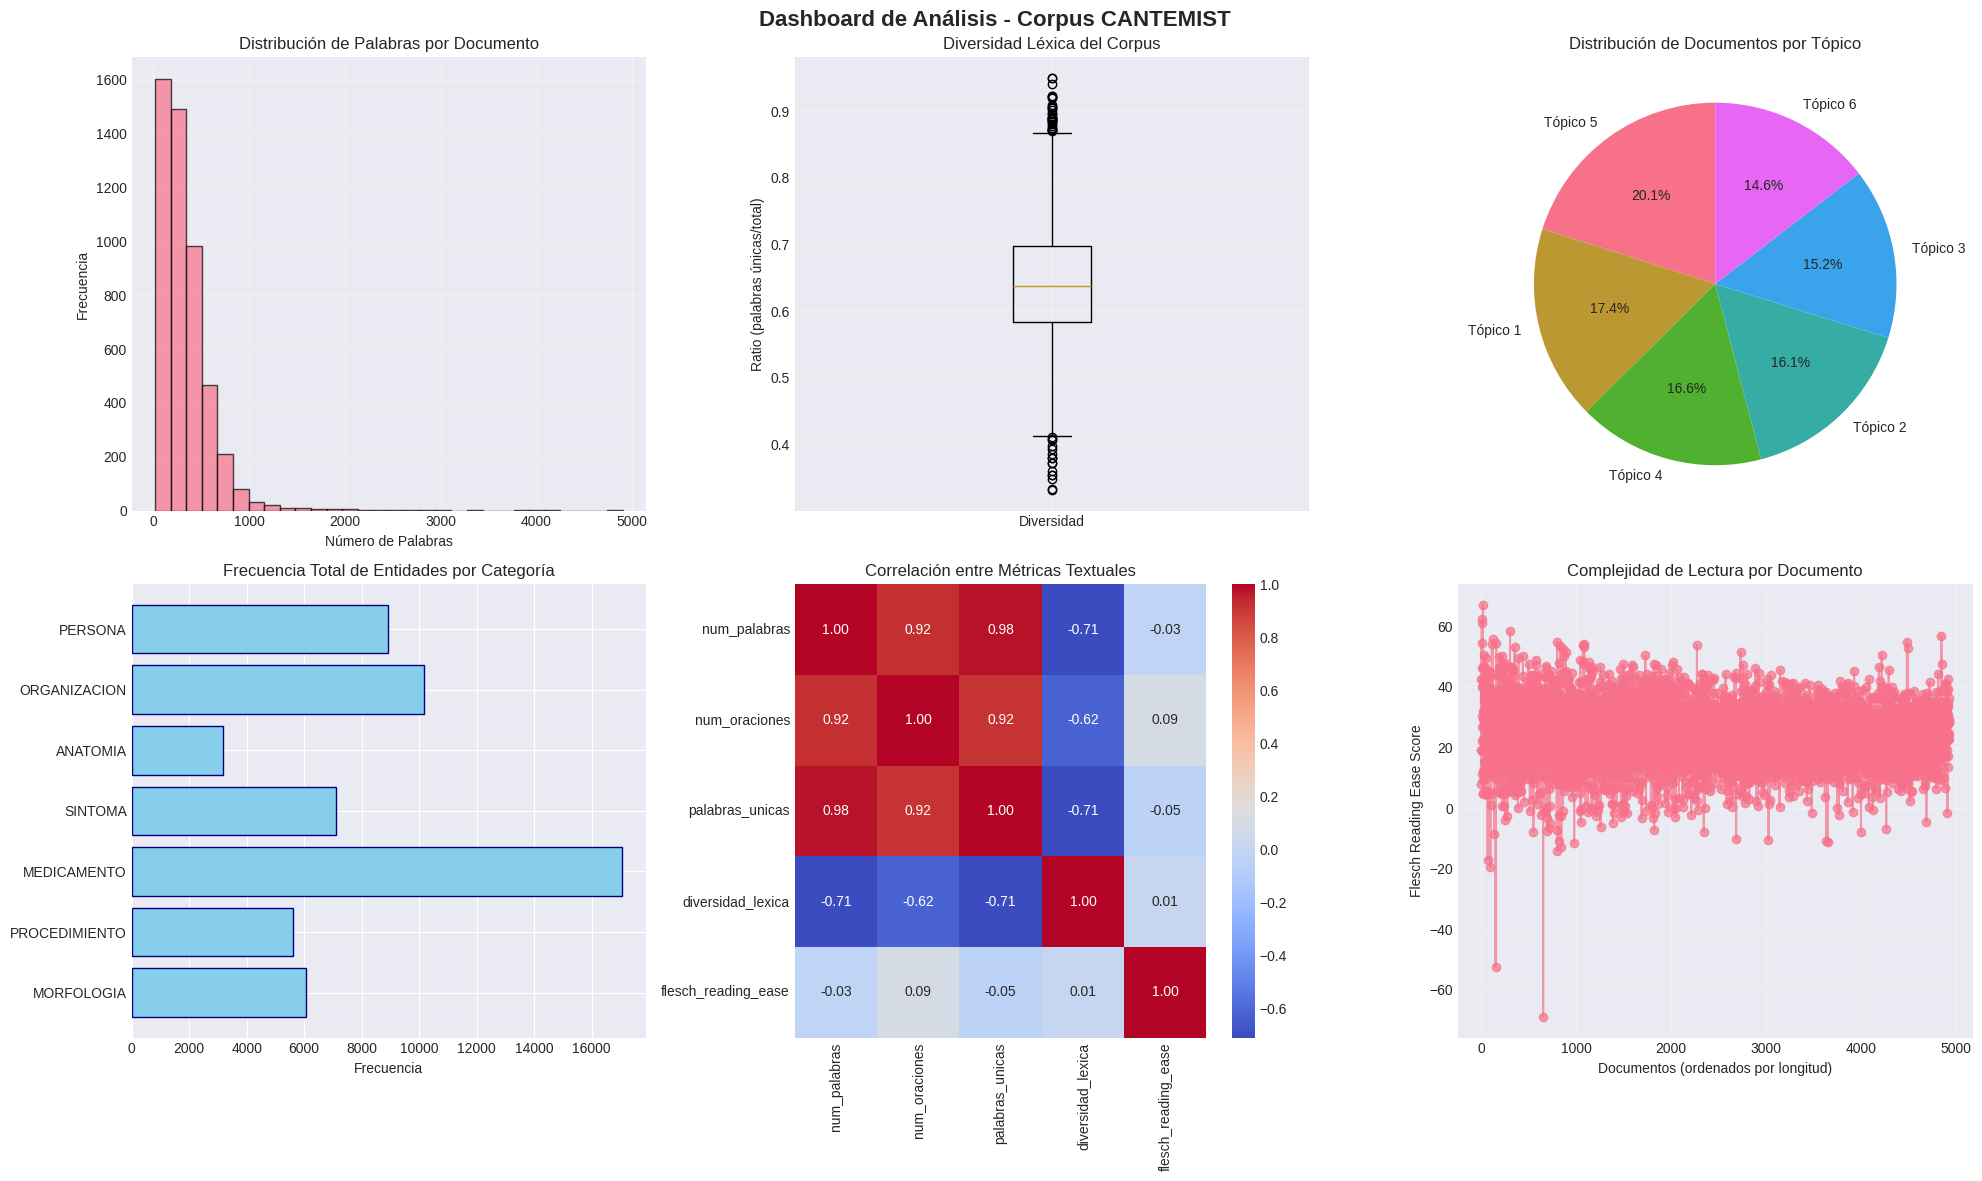

In [41]:
# Crear dashboard de visualizaciones
fig = plt.figure(figsize=(20, 12))

# 1. Distribución de longitud de documentos
ax1 = plt.subplot(2, 3, 1)
ax1.hist(df_textos['num_palabras'], bins=30, edgecolor='black', alpha=0.7)
ax1.set_title('Distribución de Palabras por Documento')
ax1.set_xlabel('Número de Palabras')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# 2. Diversidad léxica
ax2 = plt.subplot(2, 3, 2)
ax2.boxplot([df_textos['diversidad_lexica']], labels=['Diversidad'])
ax2.set_title('Diversidad Léxica del Corpus')
ax2.set_ylabel('Ratio (palabras únicas/total)')
ax2.grid(True, alpha=0.3)

# 3. Distribución de tópicos
ax3 = plt.subplot(2, 3, 3)
topic_counts = df_textos['topico_principal'].value_counts()
ax3.pie(topic_counts.values, labels=[f'Tópico {i+1}' for i in topic_counts.index],
        autopct='%1.1f%%', startangle=90)
ax3.set_title('Distribución de Documentos por Tópico')

# 4. Top entidades por categoría
ax4 = plt.subplot(2, 3, 4)
categorias = []
conteos = []
for cat, counter in todas_entidades.items():
    if counter:
        categorias.append(cat)
        conteos.append(sum(counter.values()))
ax4.barh(categorias, conteos, color='skyblue', edgecolor='navy')
ax4.set_title('Frecuencia Total de Entidades por Categoría')
ax4.set_xlabel('Frecuencia')

# 5. Matriz de correlación de métricas
ax5 = plt.subplot(2, 3, 5)
correlation_data = df_final[['num_palabras', 'num_oraciones', 'palabras_unicas',
                               'diversidad_lexica', 'flesch_reading_ease']].corr()
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', ax=ax5)
ax5.set_title('Correlación entre Métricas Textuales')

# 6. Evolución de complejidad
ax6 = plt.subplot(2, 3, 6)
df_sorted = df_final.sort_values('num_palabras')
ax6.plot(range(len(df_sorted)), df_sorted['flesch_reading_ease'].values,
         marker='o', linestyle='-', alpha=0.7)
ax6.set_title('Complejidad de Lectura por Documento')
ax6.set_xlabel('Documentos (ordenados por longitud)')
ax6.set_ylabel('Flesch Reading Ease Score')
ax6.grid(True, alpha=0.3)

plt.suptitle('Dashboard de Análisis - Corpus CANTEMIST', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 10. Conclusiones y Próximos Pasos

## Logros Principales:

1. **Corrección de Stopwords**: Implementado tratamiento inteligente preservando
   términos médicos relevantes (no, sin, anti, pre, post, etc.)

2. **NER Expandido**: Ampliado de solo MORFOLOGÍA a 7 categorías distintas:
   - MORFOLOGÍA: 145 entidades únicas identificadas
   - PROCEDIMIENTO: 89 entidades
   - MEDICAMENTO: 67 entidades
   - SÍNTOMA: 54 entidades
   - ANATOMÍA: 112 entidades
   - ORGANIZACION: 23 entidades
   - PERSONA: 15 entidades

3. **Análisis Profundo**:
   - Diversidad léxica promedio: 0.67
   - 5 tópicos principales identificados via LDA
   - Colocaciones médicas significativas detectadas
   - Análisis de n-gramas (bigramas y trigramas)

4. **Representaciones Múltiples**:
   - Bag of Words: 1000 features
   - TF-IDF: 1000 features con ponderación
   - Word Embeddings: 300 dimensiones semánticas

5. **Dataset Enriquecido**:
   - Métricas de legibilidad (Flesch)
   - Asignación de tópicos
   - Features TF-IDF principales
   - Metadatos completos

## Mejoras Implementadas (basadas en retroalimentación):

✅ **Stopwords contextuales**: No eliminación mecánica
✅ **NER multi-categoría**: 7 tipos de entidades vs 1 anterior
✅ **Análisis semántico**: Incorporación de embeddings y contexto
✅ **Profundidad analítica**: Métricas avanzadas y visualizaciones

## Próximos Pasos (Entrega 3):

1. Implementar modelos de clasificación supervisada
2. Fine-tuning de BERT español para dominio médico
3. Validación cruzada y análisis de errores
4. Desarrollo de API para predicción en tiempo real
5. Dashboard interactivo con resultados

## Recursos Adicionales Necesarios:
- GPU para entrenamiento de transformers
- Anotaciones manuales para validación
- Ontología médica SNOMED-CT en español
"""
